In [1]:
import h5py as hp
import matplotlib.pyplot as plt
import numpy as np
import illustris_python as il
import matplotlib.gridspec as gspec
import matplotlib as mpl
import copy
from hc_lib.plots.fig_lib import FigureLibrary

In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'lowgr_tng100B_099S_0A_800R/results/'
f = hp.File(path+'galaxygrid_tng100B_099S_0A_800R_pks.hdf5', 'r')


In [18]:
for k in f.keys():
    if f[k].attrs['color'] == 'resolved':
        print(f[k].attrs['gal_res'])

diemer
diemer
diemer
diemer


In [5]:
def get_match(pkfile, props):
    keys = pkfile.keys()
    matches = []
    for k in keys:
        is_match = True
        
        for p,v in props.items():
            try:
                lval = pkfile[k].attrs[p]

                is_match = (is_match and v in lval)
            except KeyError:
                continue
        if is_match:
                matches.append(k)
    return matches

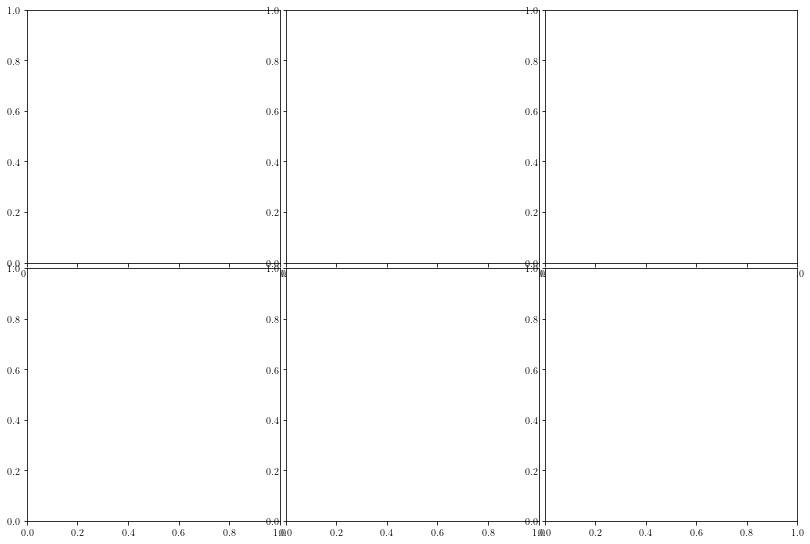

In [6]:
nrows = 2
ncols = 3
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3.5

# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols, left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.xborder = xborder
flib.yborder = yborder
flib.has_cbar_col = False
flib.figsize = [figwidth, figheight]

In [11]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)

spaces = ['real', 'redshift']
colors = ['red', 'blue', 'resolved']
for i in range(nrows):
    for j in range(ncols):
        props = {'space':spaces[i], 'color':colors[j]}
        keys_for_panels[i,j] = get_match(f, props)
        if len(keys_for_panels[i,j]) > 1:
            print(keys_for_panels)

[[list(['22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41'])
  None None]
 [None None None]]
[[list(['22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41'])
  list(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '3', '4', '5', '6', '7', '8', '9'])
  None]
 [None None None]]
[[list(['22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41'])
  list(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '3', '4', '5', '6', '7', '8', '9'])
  list(['42', '43'])]
 [None None None]]
[[list(['22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41'])
  list(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '3', '4', '5', '6', '7', '8', '9'])
  list(['42', '43'])]

In [17]:
ks = keys_for_panels[0,2]
for k in ks:
    print(f[k].attrs['gal_res'])

diemer
diemer


In [16]:
def _get_line(keys, propname, propval):
    plot_pk = []
    for k in keys:
        if f[k].attrs[propname] == propval:
            arr = f[k]
            wn = arr[0,:]
            plot_pk.append(arr[1,:])
            print('found vals')
#             print(f[k].attrs['count'])
    return wn, plot_pk[0]
            
        
        
for i in range(nrows):
    for j in range(ncols):
        idx = (i,j)
        keys = keys_for_panels[idx]
        wn, pk = _get_line(keys, 'gal_res','low-threshold')
        flib.plotLinePanel(idx, wn, pk, label = 'Low', color = 'lime')
        wn, pk = _get_line(keys, 'gal_res','mid-threshold')
        flib.plotLinePanel(idx, wn, pk, label = 'Mid', color = 'cyan')
        wn, pk = _get_line(keys, 'gal_res','high-threshold')
        flib.plotLinePanel(idx, wn, pk, label = 'High', color = 'salmon')
        wn, pk = _get_line(keys, 'gal_res','higher-threshold')
        flib.plotLinePanel(idx, wn, pk, label = 'Higher', color = 'blue')

found vals
found vals
found vals
found vals
found vals
found vals
found vals
found vals


UnboundLocalError: local variable 'wn' referenced before assignment